In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.width',500)
df=pd.read_csv("/kaggle/input/breast-cancer-dataset/data.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
y=df["diagnosis"]
X=df.drop(['diagnosis','id'],axis=1)

In [5]:
#Değişkenleri çıkartmak için fonksiyon
def create_pca_df(X,y):
    sc=StandardScaler().fit_transform(X)
    pca=PCA(n_components=2)
    pca_fit=pca.fit_transform(X)
    pca_df=pd.DataFrame(data=pca_fit,columns=['PC1','PC2'])
    final_df=pd.concat([pca_df, pd.DataFrame(y)],axis=1)
    return final_df

In [6]:
pca_df=create_pca_df(X,y)

In [7]:
pca_df.head()

,PC1,PC2,diagnosis
0,1160.142574,-293.917544,M
1,1269.122443,15.630182,M
2,995.793889,39.156743,M
3,-407.180803,-67.380320,M
4,930.341180,189.340742,M


In [8]:
#Görselleştirme fonksiyonu
def plot_pca(df,target):
    fig=plt.figure(figsize=(7,5))
    ax=fig.add_subplot(1,1,1)
    ax.set_xlabel("PC1", fontsize=15)
    ax.set_ylabel("PC2", fontsize=15)
    ax.set_title(f'{target.capitalize()}',fontsize=20)
    
    targets=list(df[target].unique())
    colors=random.sample(["r","b","y","g","m","k","c"],  len(targets))
    
    for t,color in zip(targets,colors):
        indices=df[target]==t
        ax.scatter(df.loc[indices,'PC1'],df.loc[indices,'PC2'], c=color, s=50)
    ax.legend(targets)
    ax.grid()
    plt.show()

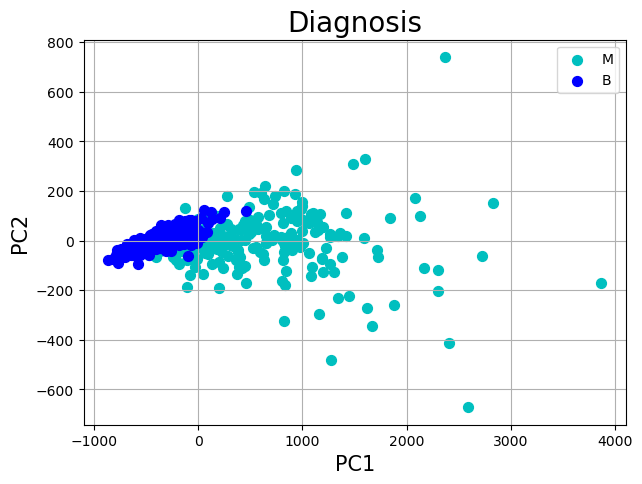

In [9]:
plot_pca(pca_df,'diagnosis')